# Regular Tasks for Machine Learning and Statistics 2022
<hr style="border-top: 1px solid #001a79;" />
<h1 style="color: #001a79;">Models Exercises</h1>

<hr style="border-top: 1px solid #001a79;" /> 

need narrate code and amend code on this

<h3 style="color: #001a79;">Exercise 2.1</h3>

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

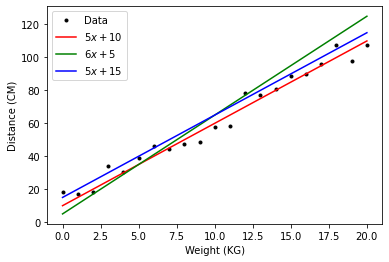

In [9]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

In [10]:
# Calculate the cost of the lines above for the data above.
# Code adapted from: https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c)**2 for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   503.92
Cost with m =  6.00 and c =  5.00:  1894.29
Cost with m =  5.00 and c = 15.00:   799.15


<h3 style="color: #001a79;">Exercise 2.2</h3>

Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]

y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]


In [20]:
# Optimization.
import scipy.optimize as so
import numpy as np
import matplotlib.pyplot as plt

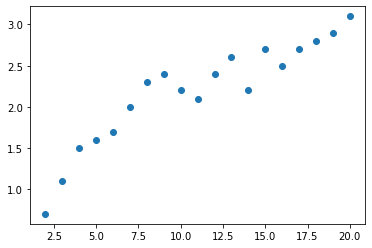

In [24]:
#Plotting the provided points.
x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])
#converted to np arrays
plt.plot(x, y, "o")

In [15]:
np.polyfit(x,y,1)

array([0.10315789, 1.04947368])

In [27]:
# Previous, analytical result.
m_a, c_a = np.polyfit(x, y, 1)
# Print analytical results.
m_a, c_a

(0.10315789473684209, 1.0494736842105263)

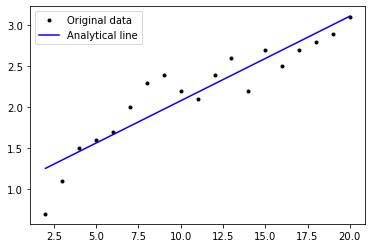

In [28]:
# Plot the best fit line from the optimization.
#fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x, y, 'k.', label='Original data')
#ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
plt.plot(x, m_a * x + c_a, 'b-', label='Analytical line')
plt.legend()

# Show the plot.
plt.show()

In [29]:
# We are going to use minimize function in scipy.optimize.
# So - what do we need? First we need a function to minimze.

# x and y are have fixed values in this scenario as above.

# The function to be minimized - the cost function.
# It must take a single argument! But our cost function takes 2: m and c.
# So, we'll put them in a list called MC. e.g. MC = (5, 10)
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [30]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2.0, 2.0))
# Show the results.
result

      fun: 1.0395789473691037
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([2.98023224e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [31]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315786014998399, 1.04947405671058)

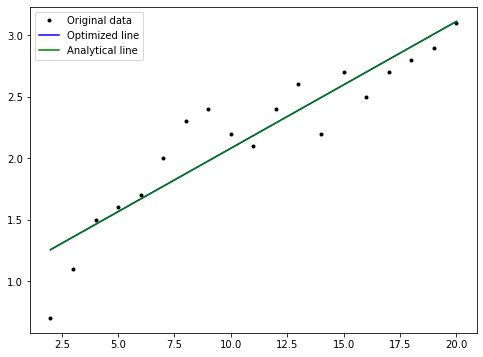

In [32]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

## ***References***
I used ATU video Lectures by Ian McLoughlin and class notes to complete this work.
In addition I searched online using the following websites which were used for the relevant sections of this assessment as detailed.
- ***Exercise 1.1***

[Stack Overflow](https://stackoverflow.com/a/4941932)

[Python](https://docs.python.org/3/library/math.html)

- ***Exercise 1.1 Bonus***

